# Winter 2021 Data Science Intern Challenge

## Read dataset

In [6]:
import matplotlib.pyplot as plt
import os
import pandas as pd

In [3]:
DATA_PATH = os.path.join("data", 'dataset.csv')

In [4]:
data = pd.read_csv(DATA_PATH)
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [5]:
print("The AOV is:",data["order_amount"].mean())

The AOV is: 3145.128


## Evaluation of the data

In this section, we will analyse each column to see if there is a suspicious activity that will affect our AVO. As said in the challenge, the AOV is 3145.13$

As we can see with the command data.info() below, there is no null value. We don't have to do any special operations on the rows. However, we can see that the order_id column is only an increment. Therefore, we won't consider it in our analysis.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


The second step, it to check if there is any outliers in our values.

### Evaluation of the user id variable

As we can see, there is no outlier for the user_id variable. There isn't a customer who bought an excessive amount of shoes.

<AxesSubplot:>

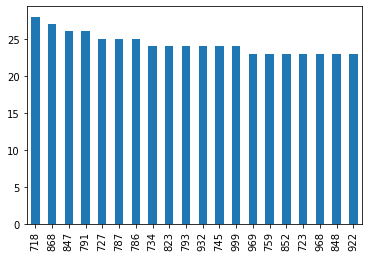

In [19]:
data.user_id.value_counts()[:20].plot(kind='bar')

### Evaluation of the shop_id variable

Again, there is no outlier for this variable.

<AxesSubplot:>

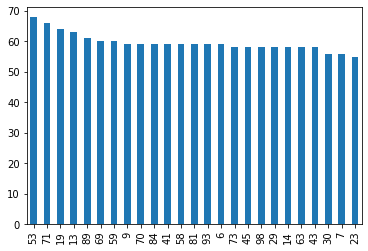

In [32]:
data.shop_id.value_counts()[:25].plot(kind='bar')

### Evaluation of the total_items variable

In [21]:
data.total_items.value_counts()

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

In this case, we can see something interesting! All of the orders are between 1 and 8 shoes expect for 17 of them. They are for 17 pair of shoes! This, obviously will impact our AOV. I will check deeper what's the issue.

In [24]:
data_total_2000 = data[data['total_items'] == 2000]
data_total_2000.head(17)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


We notice that all of these orders were made from the same shop (shop_id 42) and during the same month at the same time. It most likely looks as if these orders were tests. Also, we can see that most of these orders weren't 2000.

In [27]:
data_shop42 = data[data['shop_id'] == 42]
data.total_items.value_counts()

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

### New Metric

We just concluded that all total_items of 2000 should be removed.

Now we have to consider what is the best metric to calculate our new AOV. We will consider the average and the median. 

In [28]:
new_data = data[data['total_items'] != 2000]

In [30]:
print("The old AOV calculated with average is:", data["order_amount"].mean())
print("The new AOV calculated with average is:", new_data["order_amount"].mean())
print("The old AOV calculated with median is:", data["order_amount"].median())
print("The new AOV calculated with median is:", new_data["order_amount"].median())

The old AOV calculated with average is: 3145.128
The new AOV calculated with average is: 754.0919125025085
The old AOV calculated with median is: 284.0
The new AOV calculated with median is: 284.0


## Conclusion

As we can see, outliers can affect the AOV. In this dataset, there was 17 orders where a customer bought 2000 shoes. These orders could've been a test made by the owner, a fraud, ... These case should't be considered in the calculation of the AOV. Therefore, we need a better metric. We spotted that even by removing these 17 orders, the AOV didn't change when we used the median as a metric. Thus, I recommend using the median. The AOV with the medan is 284$